In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from numpy.linalg import inv, det

In [36]:
from google.colab import drive
drive.mount("/content/drive")
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


In [37]:
df=pd.read_csv("diamond.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
df.shape

(53940, 11)

In [39]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [40]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [41]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [42]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [43]:
df = df.drop(['Unnamed: 0'], axis = 1)


In [44]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [45]:
features = ['depth','table','price','x','y','z']
for i in features:
  mx=df[i].max()
  mi=df[i].min()


  df[i]=(df[i]-mi)/(mx-mi)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.21,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.23,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.29,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.31,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.72,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.70,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.86,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


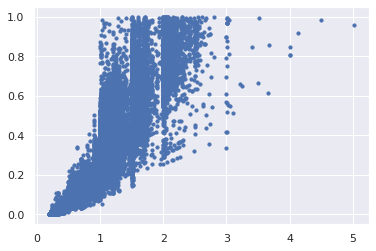

In [46]:
plt.scatter(df['carat'],df['price'],s=10)
plt.show()

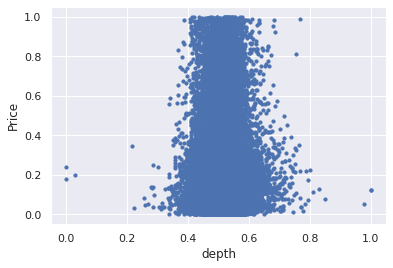

In [47]:
plt.scatter(df['depth'],df['price'],s=10)
plt.xlabel('depth')
plt.ylabel("Price")
plt.show()

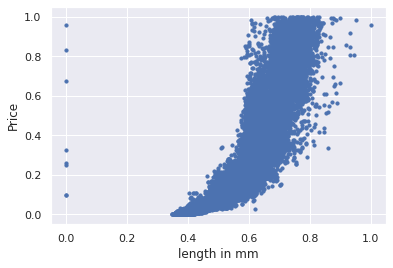

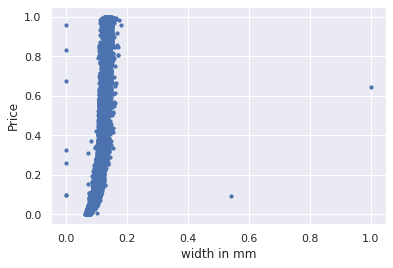

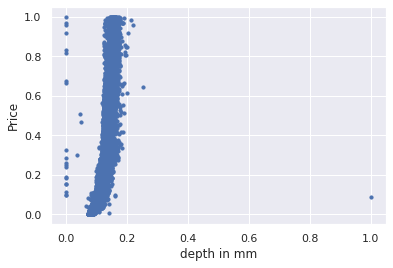

In [48]:
plt.scatter(df['x'],df['price'],s=10)
plt.xlabel('length in mm')
plt.ylabel("Price")
plt.show()

plt.scatter(df['y'],df['price'],s=10)
plt.xlabel('width in mm')
plt.ylabel("Price")
plt.show()

plt.scatter(df['z'],df['price'],s=10)
plt.xlabel('depth in mm')
plt.ylabel("Price")
plt.show()

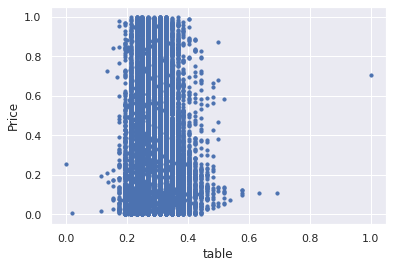

In [49]:
plt.scatter(df['table'],df['price'],s=10)
plt.xlabel('table')
plt.ylabel("Price")
plt.show()

<AxesSubplot:>

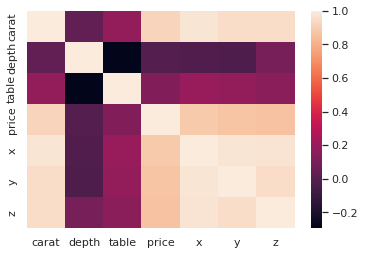

In [50]:
sns.heatmap(df.corr())

In [51]:
df['cut'].value_counts()
df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[0,1,2,3,4],inplace=True)

In [52]:
df['color'].value_counts()
df['color'].replace(['G','E','F', 'H','D','I','J'],[0,1,2,3,4,5,6],inplace=True)

In [53]:
df['clarity'].value_counts()
df['clarity'].replace(['SI1','VS2','SI2', 'VS1','VVS2','VVS1','IF','I1'],[0,1,2,3,4,5,6,7],inplace=True)

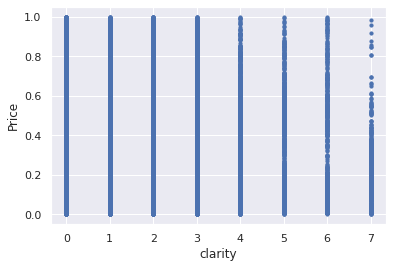

In [54]:
plt.scatter(df['clarity'],df['price'],s=10)
plt.xlabel('clarity')
plt.ylabel("Price")
plt.show()

In [55]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [56]:
df = df.drop(['table','depth','cut','color','clarity'], axis = 1)

In [57]:
df.head(10)

,carat,price,x,y,z
0,0.23,0.000000,0.367784,0.067572,0.076415
1,0.21,0.000000,0.362197,0.065195,0.072642
2,0.23,0.000054,0.377095,0.069100,0.072642
3,0.29,0.000433,0.391061,0.071817,0.082704
4,0.31,0.000487,0.404097,0.073854,0.086478
5,0.24,0.000541,0.366853,0.067233,0.077987
6,0.24,0.000541,0.367784,0.067572,0.077673
7,0.26,0.000595,0.378957,0.069779,0.079560
8,0.22,0.000595,0.360335,0.064177,0.078302
9,0.23,0.000649,0.372439,0.068761,0.075157


In [58]:
df = df[df['price'] >= 0.04]  

In [59]:
df['price'].value_counts()

0.040763    65
0.040547    59
0.072228    52
0.070174    49
0.060010    48
            ..
0.585987     1
0.585825     1
0.585554     1
0.585446     1
0.487701     1
Name: price, Length: 10881, dtype: int64

In [60]:
df.shape

(38158, 5)

In [61]:
shuffled_df=df.sample(frac=1)
shuffled_df.head()
training_size= int(len(shuffled_df)*0.8)
train_df=shuffled_df[:training_size]
test_df=shuffled_df[training_size:]

In [62]:
X_train = train_df.drop(['price'], axis = 1)
X_test = test_df.drop(['price'],axis = 1)
Y_train = train_df['price']
Y_test = test_df['price']

In [63]:
X_train.shape


(30526, 4)

In [64]:
X_test.shape


(7632, 4)

In [65]:
Y_train.shape


(30526,)

In [66]:
Y_test.shape


(7632,)

## **LINEAR REGRESSION**

In [67]:
class LinRegression():

  def __init__(self) -> None:
      
      self.OLS= 0

  def fit(self,X_train,Y_Train):
    w1 = np.dot(X_train.T,X_train)
    w1inv=np.linalg.inv(w1)
    w2 = np.dot(X_train.T,Y_train)

    self.OLS = np.dot(w1inv,w2)                                             

  def predict(self,x_test,y_test):

    y_pred = np.dot(x_test,self.OLS)
    # print(self.bias)
    return y_pred

def mean_squared_error(Y_test, Y_pred):
        return np.mean((Y_test - Y_pred) * (Y_test - Y_pred))


In [68]:
model = LinRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test,Y_test)
print(predictions)

[0.26885109 0.26981571 0.28288619 ... 0.7389527  0.58622887 0.0650752 ]


In [69]:
print("Mean squared error: ",mean_squared_error(Y_test,predictions))

Mean squared error:  0.009239127204716742


In [88]:
weights = model.OLS

In [105]:
import pickle
with open('weights_linear.pkl', 'wb') as f:
  pickle.dump(weights, f)
from google.colab import files
files.download('weights_linear.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
temp = pd.read_pickle('weights_linear.pkl')
temp

array([ 0.52641282, -0.61668997,  1.84774709, -0.74353044])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Predicted Price'>

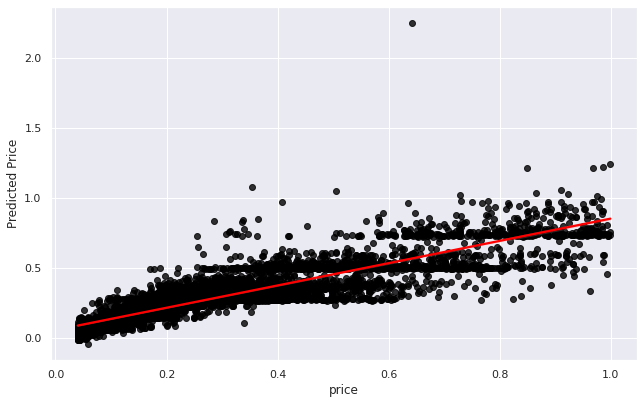

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6.5)
sns.set_theme(color_codes=True)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
sns.regplot(Y_test,predictions,scatter_kws={"color": "black"}, line_kws={"color": "red"})

# **RIDGE REGRESSION**

In [91]:
I_matrix = np.identity(4)
lamdaVal = 10

w1 = np.dot(np.transpose(X_train),X_train) + np.dot(lamdaVal,I_matrix)
w1inv=np.linalg.inv(w1)
w2 = np.dot(np.transpose(X_train),Y_train)

OLS = np.dot(w1inv,w2)   

y_pred= np.dot(X_test,OLS)
lamdaVal=10

Squared_error = ((1/2)*((Y_test - y_pred) * (Y_test - y_pred)).sum())+((1/2)*lamdaVal*np.dot(np.transpose(OLS),OLS))
print(Squared_error)

36.535328244081214


In [92]:
weights2 = OLS

In [104]:
import pickle
with open('weights_ridge.pkl', 'wb') as f:
  pickle.dump(weights2, f)
from google.colab import files
files.download('weights_ridge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
temp = pd.read_pickle('weights_ridge.pkl')
temp

array([ 0.5210347 , -0.38896239, -0.0265713 , -0.14960622])

<AxesSubplot:xlabel='price', ylabel='Predicted Price'>

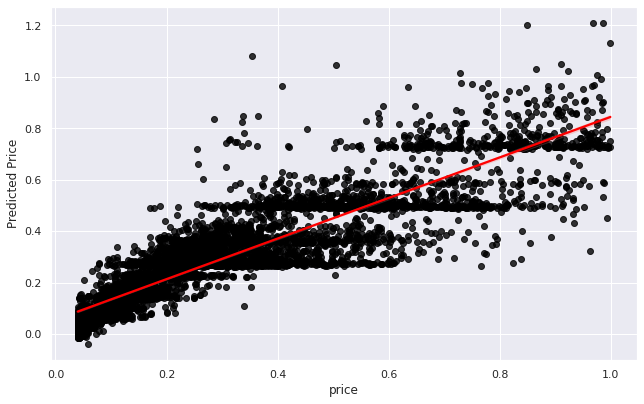

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6.5)
sns.set_theme(color_codes=True)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
sns.regplot(Y_test,y_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})